In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [347]:
# Loading and checking the data
bike = pd.DataFrame(pd.read_csv("/Users/shivam.sachdeva/Downloads/AI_ML/submission/Bike sharing/day.csv"))
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [348]:
# Check the information of bike
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [349]:
print(bike.describe())
print("shape:")
print(bike.shape)

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.5448

Checking for NULL or MISSING values

In [350]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing Null values either in data frame

In [351]:
bike.drop_duplicates(subset=None, inplace=True)
print(bike.shape)

(730, 16)


Shape is same as before and after removing duplicates, hence no duplicates are present

##### Removing Unwanted Columns #####

In [352]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [353]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [354]:
## Removing Columns as

#Instant Column contains index thus no use for evaluation

#dteday : It contains date, Since we have seperate columns for 'year' & 'month',hence, we can leave this column.

#casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

In [355]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [356]:
#converting following columns to category type as they are helpful for model evaluation

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [357]:
#Creating Dummy Variables for Category columns

bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

#### Model Learning ####

In [358]:
#Splitting data into train and test data

from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 100)

In [359]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null   

In [360]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null   

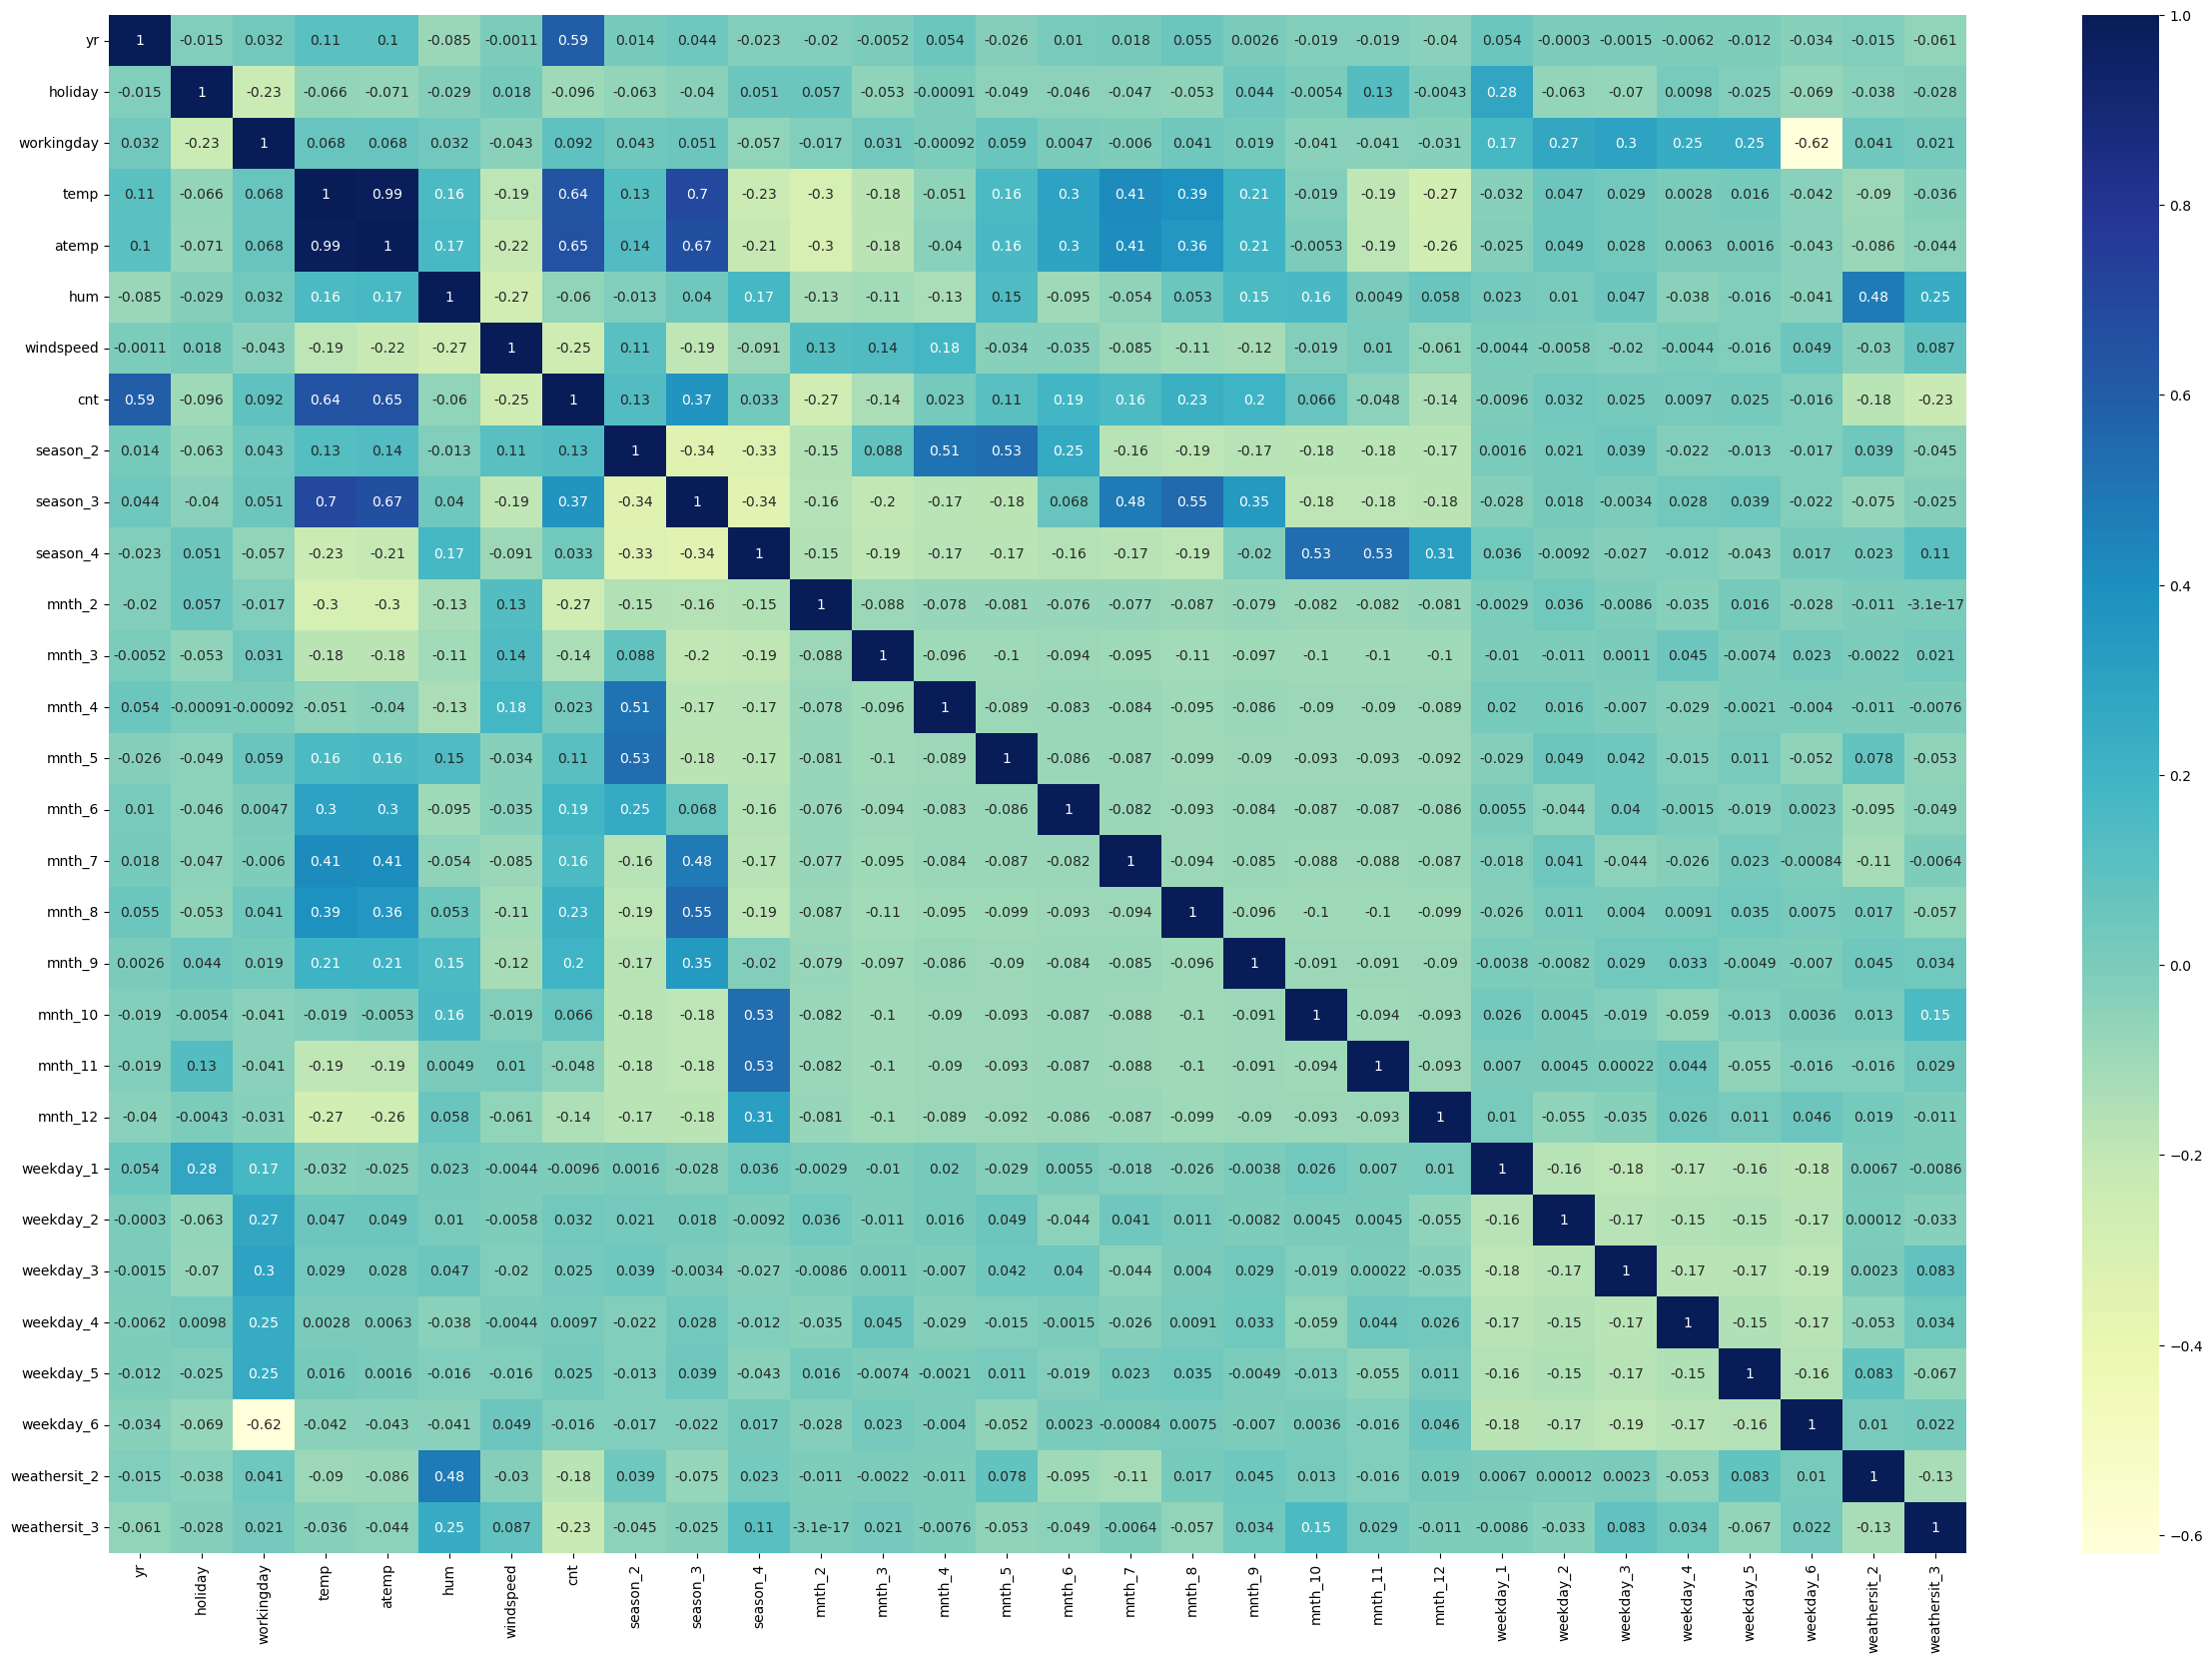

In [361]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

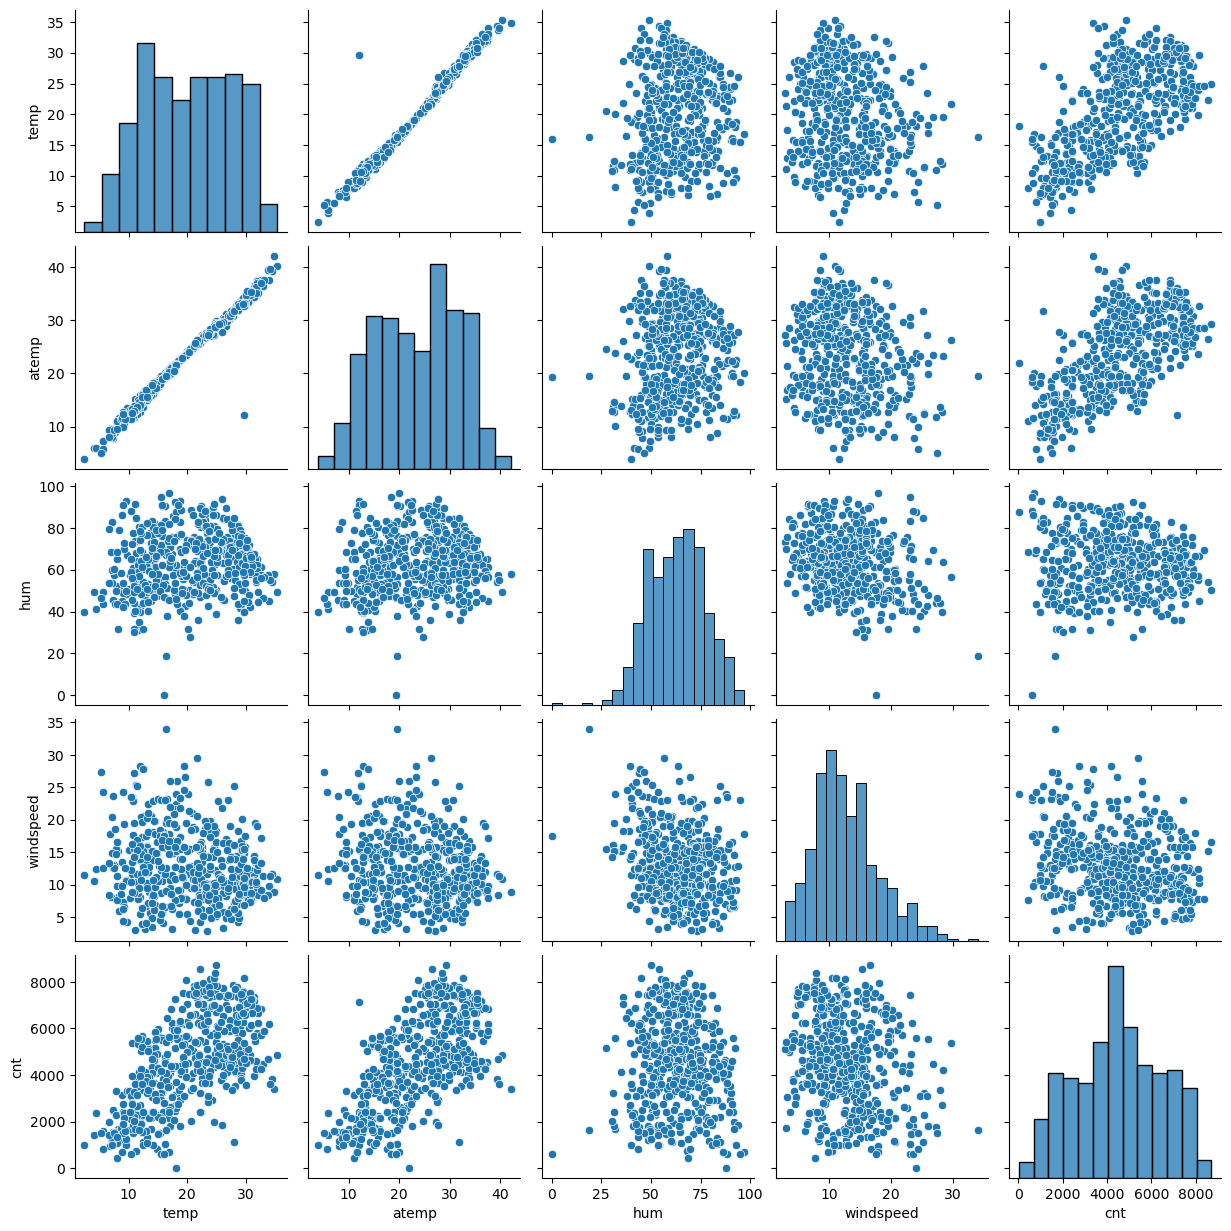

In [362]:
# Checking pairplot for numeric variables:

bike_numeric=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_numeric)
plt.show()

In [363]:
#Above graph shows there is high correlation b/w temp and atemp and cnt

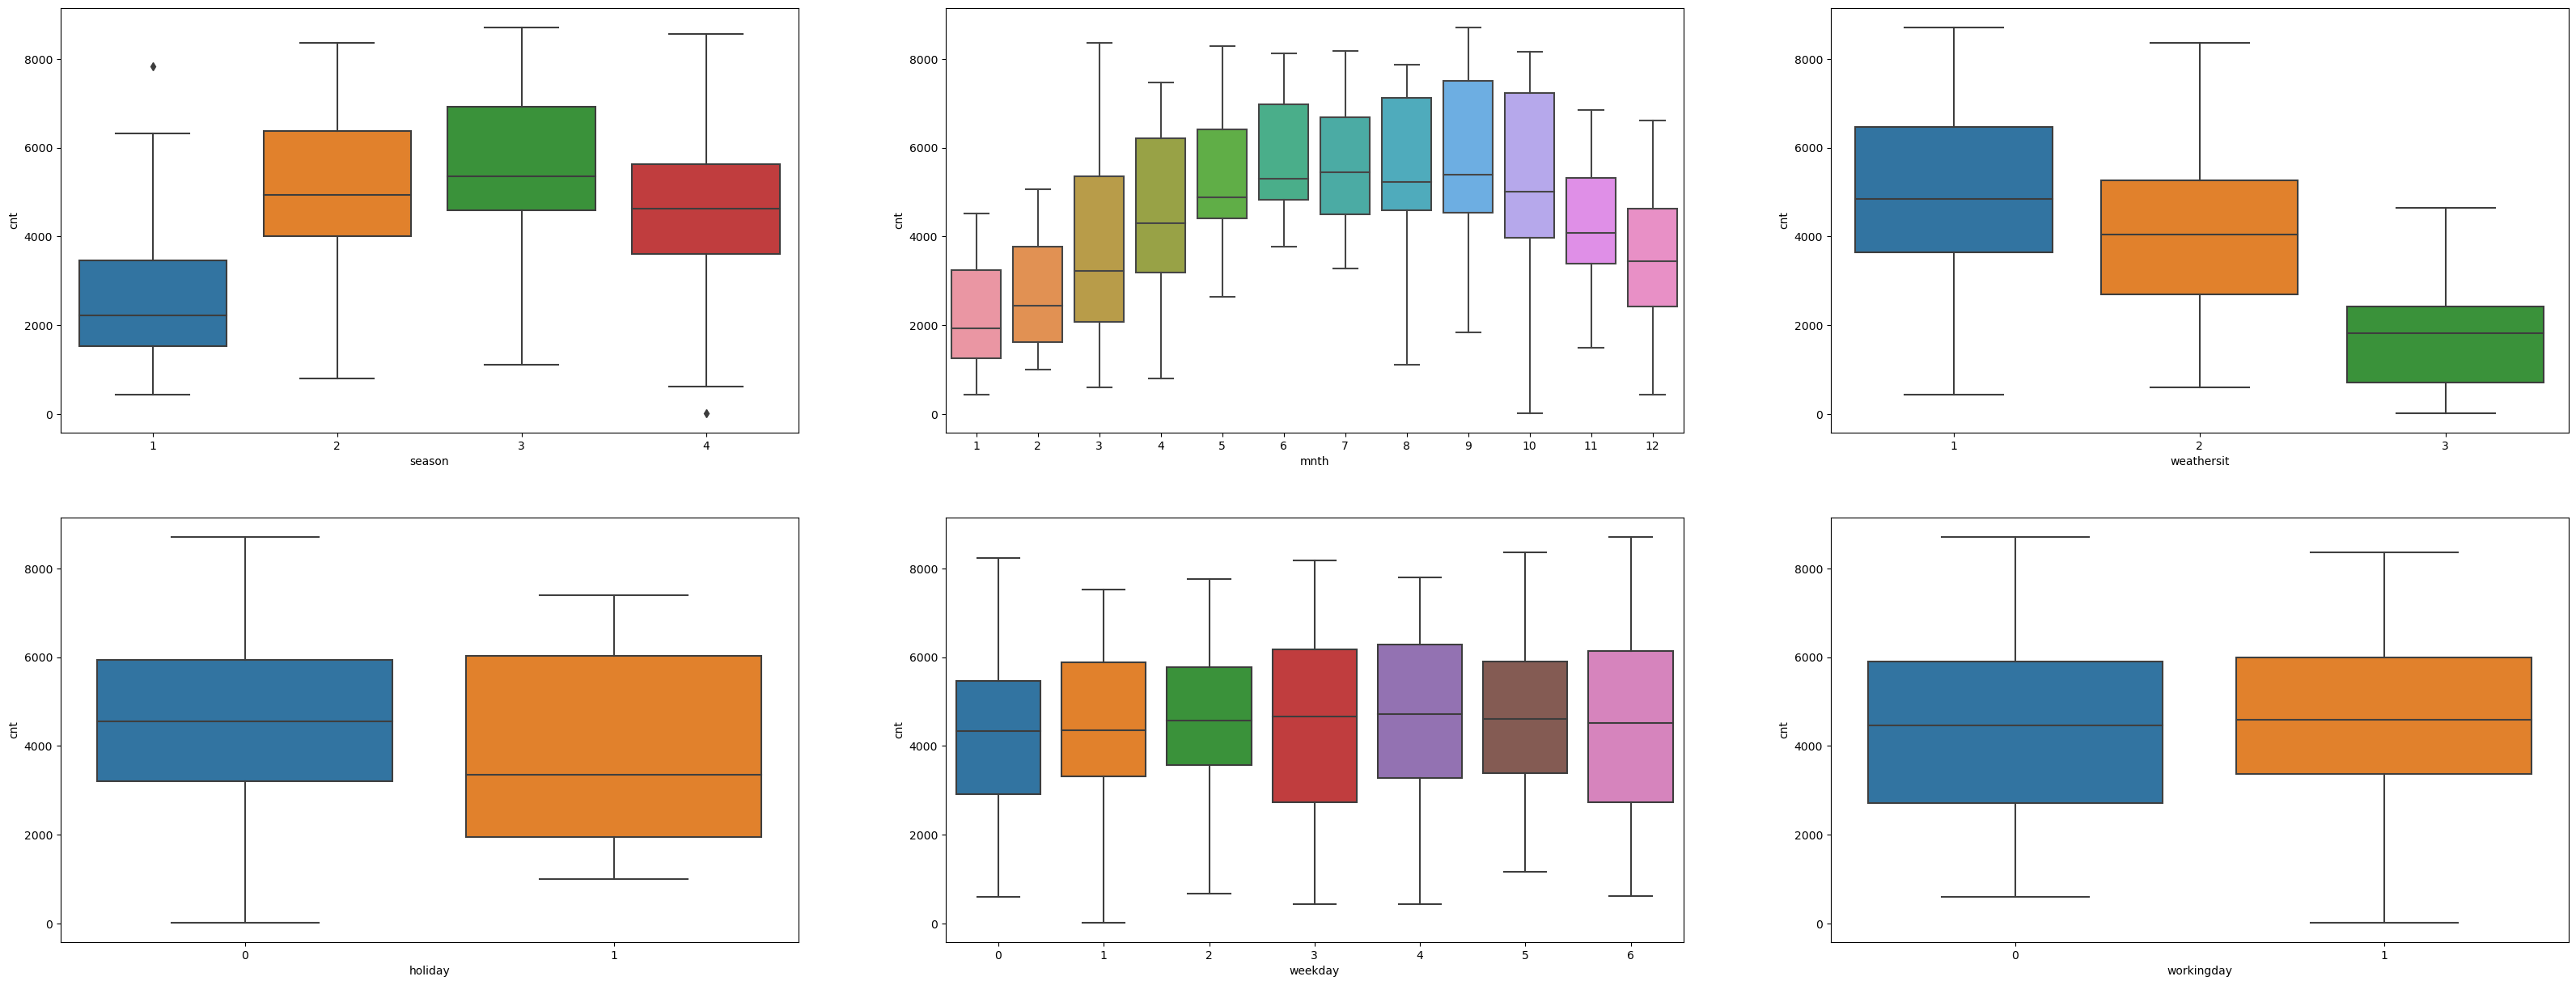

In [364]:
# Checking pairplot for categorical variables:

plt.figure(figsize=(40, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

- Season: With a median of over 5000 bookings, season 3 saw the majority of bike reservations. Then came seasons 2 and 4 after this. The season can therefore be an effective predictor of the dependent variable.

- Weathersit: Most of the bike booking happened during ‘weathersit1 with a median of close to 5000 booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

- Mnth: With a median of approximately 4000 bookings every month, the majority of bike reservations took place in the months 5, 6, 7, 8, & 9. This suggests that mnth has a clear trend and can serve as a reliable predictor of the dependent variable.

- Workingday: 'Workingday' saw the majority of bike bookings, with a median of over 5000 bookings. This suggests that the working day can serve as a reliable predictor of the dependent variable.

- Holiday: Most of the bike booking were happened when it is not a holiday which means this data is not reliable. This indicates, holiday CANNOT be a good predictor for the dependent variable.

- Weekday: The weekday variable exhibits a very close trend, with independent median reservations ranging from 4,000 to 5,000. This variable may or may not have any bearing on the predictor.

Applying Scaling to columns

In [365]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [366]:
# Apply scaler() to all the numeric variables


num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [367]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


Dividing into X and Y sets for the model building

In [368]:
y_train = df_train.pop('cnt')
X_train = df_train

Building a linear model

In [369]:
# Check all the columns of the dataframe

bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [370]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const           0.175618
yr              0.232208
holiday        -0.042394
workingday      0.043879
temp            0.401322
atemp           0.050628
hum            -0.151812
windspeed      -0.184388
season_2        0.086796
season_3        0.048580
season_4        0.153968
mnth_2          0.030389
mnth_3          0.063853
mnth_4          0.062565
mnth_5          0.087257
mnth_6          0.060862
mnth_7          0.023289
mnth_8          0.078641
mnth_9          0.144371
mnth_10         0.070260
mnth_11         0.020783
mnth_12         0.016994
weekday_1      -0.009946
weekday_2      -0.007753
weekday_3       0.005823
weekday_4       0.001806
weekday_5       0.011556
weekday_6       0.054533
weathersit_2   -0.061030
weathersit_3   -0.256697
dtype: float64

In [371]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 10 May 2023   Prob (F-statistic):          8.42e-181
Time:                        20:19:14   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1756      0.030      5.777   

Checking VIF

In [372]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [373]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,weekday_4,inf
2,workingday,inf
23,weekday_3,inf
22,weekday_2,inf
21,weekday_1,inf
25,weekday_5,inf
1,holiday,inf
3,temp,447.70
4,atemp,383.54
5,hum,20.79


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, atemp as it has a very high p-value of 0.714. Let's go ahead and drop this variables

In [374]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('atemp', 1,)

Model 2

In [375]:
# Build another fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [376]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 10 May 2023   Prob (F-statistic):          8.74e-182
Time:                        20:19:14   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1760      0.030      5.798   

In [377]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,weekday_4,inf
24,weekday_5,inf
2,workingday,inf
22,weekday_3,inf
21,weekday_2,inf
20,weekday_1,inf
1,holiday,inf
3,temp,47.06
4,hum,20.65
7,season_3,15.40


Model 3


Removing the variable 'hum' based on its Very High 'VIF' value so decided to drop 'hum'

In [378]:
#Dropping hum variable
X = X.drop('hum', 1,)

#Building the model again
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [379]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     104.1
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.60e-179
Time:                        20:19:14   Log-Likelihood:                 519.90
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     483   BIC:                            -871.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0900      0.021      4.211   

In [380]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,weekday_3,inf
22,weekday_4,inf
2,workingday,inf
20,weekday_2,inf
19,weekday_1,inf
23,weekday_5,inf
1,holiday,inf
3,temp,35.65
6,season_3,15.36
7,season_4,10.93


Model 4

Removing the variable 'season_3' based on its Very High 'VIF' value so decided to drop 'season_3'

In [381]:
#Dropping season_3 variable
X = X.drop('season_3', 1,)

#Building the model again
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [382]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     107.7
Date:                Wed, 10 May 2023   Prob (F-statistic):          6.75e-180
Time:                        20:19:14   Log-Likelihood:                 518.32
No. Observations:                 510   AIC:                            -984.6
Df Residuals:                     484   BIC:                            -874.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0888      0.021      4.148   

In [383]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,weekday_3,inf
21,weekday_4,inf
2,workingday,inf
19,weekday_2,inf
18,weekday_1,inf
22,weekday_5,inf
1,holiday,inf
3,temp,35.18
6,season_4,8.08
10,mnth_5,6.52


Model 5

Removing the variable 'season_4' based on its Very High 'VIF' value so decided to drop 'season_4'

In [384]:
#Dropping season_4 variable
X = X.drop('season_4', 1,)

#Building the model again
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [385]:
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 10 May 2023   Prob (F-statistic):          6.10e-174
Time:                        20:19:14   Log-Likelihood:                 501.25
No. Observations:                 510   AIC:                            -952.5
Df Residuals:                     485   BIC:                            -846.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0931      0.022      4.212   

In [386]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,weekday_2,inf
19,weekday_3,inf
2,workingday,inf
17,weekday_1,inf
20,weekday_4,inf
21,weekday_5,inf
1,holiday,inf
3,temp,35.18
9,mnth_5,6.52
12,mnth_8,6.31


Model 6

Removing the variable 'mnth_5' based on its Very High 'VIF' value so decided to drop 'mnth_5'

In [387]:
#Dropping mnth_5 variable
X = X.drop('mnth_5', 1,)

#Building the model again
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [388]:
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     105.8
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.12e-172
Time:                        20:19:15   Log-Likelihood:                 495.68
No. Observations:                 510   AIC:                            -943.4
Df Residuals:                     486   BIC:                            -841.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0925      0.022      4.145   

In [389]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,weekday_1,inf
2,workingday,inf
20,weekday_5,inf
19,weekday_4,inf
18,weekday_3,inf
17,weekday_2,inf
1,holiday,inf
3,temp,19.32
4,windspeed,4.34
5,season_2,3.85


Model 7

Removing the variable 'mnth_2','mnth_3','mnth_4','mnth_6','mnth_7','mnth_8','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5' based on its Very High 'P value'

In [390]:
#Dropping mnth_2 variable
X = X.drop(['mnth_2','mnth_3','mnth_4','mnth_6','mnth_7','mnth_8','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5'], 1,)

#Building the model again
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [391]:
# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     183.8
Date:                Wed, 10 May 2023   Prob (F-statistic):          4.41e-180
Time:                        20:19:15   Log-Likelihood:                 487.52
No. Observations:                 510   AIC:                            -947.0
Df Residuals:                     496   BIC:                            -887.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0960      0.020      4.760   

In [392]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.97
2,workingday,4.44
4,windspeed,3.60
0,yr,2.02
10,weekday_6,1.79
5,season_2,1.60
11,weathersit_2,1.53
6,mnth_9,1.26
7,mnth_10,1.21
8,mnth_11,1.19


This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant.

In [393]:
lr_7.params

const           0.095951
yr              0.235262
holiday        -0.066293
workingday      0.049103
temp            0.535253
windspeed      -0.171700
season_2        0.086912
mnth_9          0.128482
mnth_10         0.151177
mnth_11         0.122135
mnth_12         0.072898
weekday_6       0.061370
weathersit_2   -0.081713
weathersit_3   -0.294276
dtype: float64

We can see that the equation of our best fitted line is:



cnt= 0.095951 + 0.235262*yr - 0.066293*holiday + 0.049103*workingday + 0.535253*temp - 0.171700*windspeed + 0.086912*season_2 + 0.128482*mnth_9 + 0.151177*mnth_10 + 0.122135*mnth_11 + 0.072898*mnth_12 + 0.061370*weekday_6 - 0.081713*weathersit_2 - 0.294276*weathersit_3              

Residual Analysis of the train data

Text(0.5, 0, 'Errors')

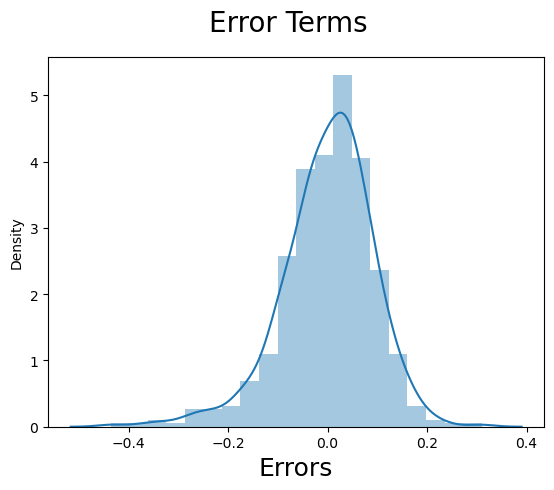

In [394]:
y_train_cnt = lr_7.predict()

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [395]:
bike_numeric=['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[bike_numeric] = scaler.transform(df_test[bike_numeric])

df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# MAKING PREDICTION USING FINAL MODEL

Dividing into X_test and y_test

In [396]:
y_test = df_test.pop('cnt')
X_test = df_test

In [397]:
#Selecting the variables that were part of final model.
col1=X.columns
X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)
X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   workingday    219 non-null    int64  
 4   temp          219 non-null    float64
 5   windspeed     219 non-null    float64
 6   season_2      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   mnth_10       219 non-null    uint8  
 9   mnth_11       219 non-null    uint8  
 10  mnth_12       219 non-null    uint8  
 11  weekday_6     219 non-null    uint8  
 12  weathersit_2  219 non-null    uint8  
 13  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(3), uint8(8)
memory usage: 13.7 KB


In [398]:
# Making predictions using the final model (lr7)

y_pred = lr_7.predict(X_test_lm7)

# Model Evaluation

Text(0, 0.5, 'y_pred')

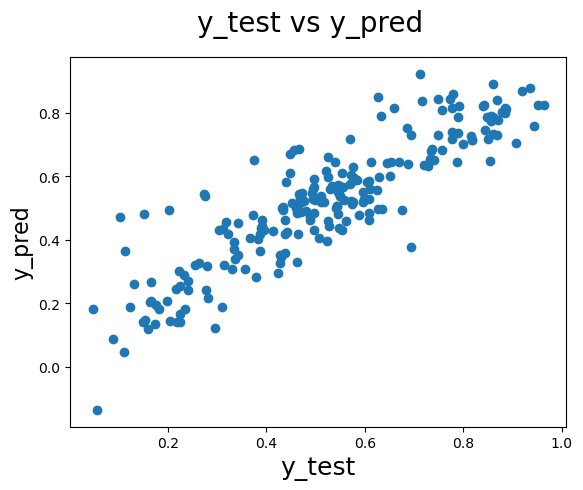

In [399]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

## R-squared test

In [400]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.782862389682796

# FINAL REPORT
As per our final Model, the top 3 predictor variables that influences the bike booking are:


Temperature (temp) - A coefficient value of ‘0.535253’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.535253 units.

Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.294276’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.294276 units.

Year (yr) - A coefficient value of ‘0.235262’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.235262 units.